# Deep Deterministic Policy Gradients (DDPG)
---
In this notebook, we train DDPG with OpenAI Gym's Pendulum-v0 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

from unityagents import UnityEnvironment

import pdb

### 2. Instantiate the Environment and Agent

In [2]:
path = 'C:\\Users\\mbgpcsk4\\Dropbox (The University of Manchester)\\D2019\\University\\Udacity\\P2_Reacher_Submission\\Udacity\\Reacher_Windows_x86_64\\Reacher.exe'

env = UnityEnvironment(file_name=path)

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

agent = Agent(state_size=33, action_size=4, random_seed=2)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
agent.reset()
agent.print_params()

Actor:

None tensor([[-0.0517, -0.0220,  0.0356,  ...,  0.0987, -0.0138,  0.0531],
        [ 0.0082,  0.0544,  0.0317,  ..., -0.1095,  0.0334, -0.1024],
        [-0.0336,  0.0204, -0.0743,  ..., -0.1066,  0.0006,  0.0996],
        ...,
        [-0.1038,  0.0649,  0.0238,  ..., -0.0580, -0.0461,  0.0893],
        [-0.0921,  0.0331, -0.0533,  ..., -0.0351, -0.0233, -0.0519],
        [-0.0162,  0.0222,  0.1032,  ..., -0.0404,  0.0546,  0.0767]], device='cuda:0')
None tensor([-0.1623,  0.1447, -0.1121, -0.1483, -0.0748,  0.1489, -0.0329,
         0.0765,  0.0120, -0.1717, -0.1592, -0.0586,  0.0689,  0.1432,
         0.0856, -0.0976, -0.0201,  0.0676, -0.0421,  0.1485, -0.1726,
         0.1512,  0.0408, -0.0114, -0.0859,  0.0218, -0.1649,  0.0894,
         0.0292,  0.0925,  0.0933,  0.0656,  0.1494,  0.0883,  0.0931,
         0.0081,  0.1258,  0.0891,  0.0947,  0.0411, -0.0500,  0.1534,
        -0.1702,  0.1463,  0.0012, -0.1155,  0.1136, -0.0390, -0.0384,
        -0.0200, -0.0443, -0.0851,

### 3. Train the Agent with DDPG

Episode 500	Average Score: 0.26
Episode 1000	Average Score: 0.56


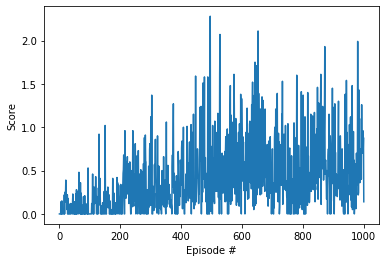

In [4]:
def ddpg(n_episodes=1000, max_t=300, print_every=500):
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        score = 0
        for t in range(1, max_t):
            #pdb.set_trace()
            actions = agent.act(states)
            env_info = env.step(action)[brain_name]
            next_states = env_info.vector_observations 
            rewards = env_info.rewards                         # get reward (for each agent)

            dones = env_info.local_done                        # see if episode finished 
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            score += np.mean(rewards)
            if done[0]:
                break 
                
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In [4]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

state = env.reset()
for t in range(200):
    action = agent.act(state, add_noise=False)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 



### 6. Explore

In this exercise, we have provided a sample DDPG agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster than this benchmark implementation.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task!
- Write your own DDPG implementation.  Use this code as reference only when needed -- try as much as you can to write your own algorithm from scratch.
- You may also like to implement prioritized experience replay, to see if it speeds learning.  
- The current implementation adds Ornsetein-Uhlenbeck noise to the action space.  However, it has [been shown](https://blog.openai.com/better-exploration-with-parameter-noise/) that adding noise to the parameters of the neural network policy can improve performance.  Make this change to the code, to verify it for yourself!
- Write a blog post explaining the intuition behind the DDPG algorithm and demonstrating how to use it to solve an RL environment of your choosing.  